In [1]:
import servicex
from servicex import ServiceXDataset
from func_adl_servicex import ServiceXDatasetSource
import matplotlib.pyplot as plt

In [2]:
dataset = ServiceXDataset("mc15_13TeV:mc15_13TeV.361106.PowhegPythia8EvtGen_AZNLOCTEQ6L1_Zee.merge.DAOD_STDM3.e3601_s2576_s2132_r6630_r6264_p2363_tid05630052_00")
query = ServiceXDatasetSource(dataset) \
    .SelectMany('lambda e: e.Jets("AntiKt4EMTopoJets")') \
    .Where('lambda j: j.pt()/1000>20 and j.eta()/1000<4.5') \
    .Select('lambda j: j.getAttributeFloat("LArQuality")') \
    .AsPandasDF("JetMoment") \
    .value()

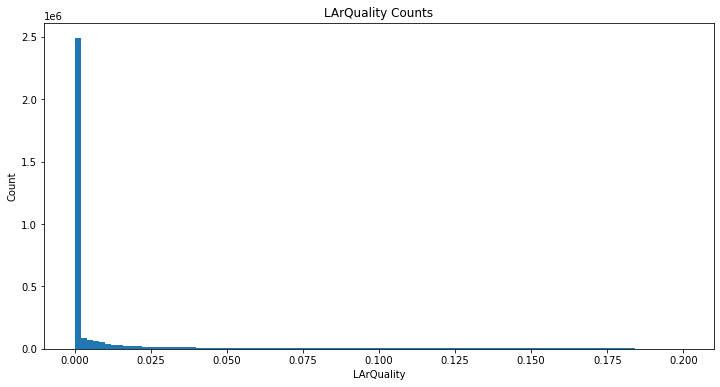

In [3]:
plt.figure(figsize=(12, 6))
plt.hist(query.JetMoment, bins=100, range=(0,0.20))
plt.title('LArQuality Counts')
plt.xlabel('LArQuality')
plt.ylabel('Count')
plt.show()